# Búsqueda de raíces

En esta sesión vemos un método para encontrar las raíces de una función con el método de bipartición y con el método de Newton Raphson.

In [1]:
from pylab import *
from scipy.integrate import *

In [2]:
def raiz_bip(f , intervalo , error=1e-6):
    x_izq , x_der = intervalo[0] , intervalo[1]
    contador = 0
    f_i , f_r = f(x_izq) , f(x_der )
    if f_i*f_r <= 0:
        f_r = 2*error
        while abs(f_r) > error and abs(x_izq-x_der) > error:
            x_raiz = 0.5*( x_izq + x_der )
            contador += 1
            f_i , f_r = f(x_izq) , f(x_raiz)
            if f_i*f_r < 0 :
                x_der = x_raiz
            else:
                x_izq = x_raiz
    else:
        print('No hay raiz en ese intervalo')
        x_raiz = nan
    return x_raiz , contador

In [3]:
intervalo = [2,4]
raiz_bip(sin,intervalo)

(3.141592025756836, 20)

In [4]:
def raiz_Newton( f , x0 , error=1e-6):
    f0 , dif ,h = 2*error , 2*error ,  1e-2
    contador = 0 
    while abs(f0) > error and dif > error:
        x0_old = x0
        f0 = f(x0)
        df0 = (f(x0+h)-f(x0-h))/(2*h) 
        x0 = x0 - f0/df0
        dif = abs(x0 - x0_old)
        contador += 1
    return x0 , contador

In [5]:
raiz_Newton(sin,2)

(3.1415926535896106, 6)

Cronometrando el tiempo dejecución de ambos algoritmos:

In [6]:
%%timeit
raiz_bip(sin,intervalo)

49.5 µs ± 1.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%%timeit
raiz_Newton(sin,2)

28.4 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Una aplicación:

In [57]:
def pendulo(t,th_vth, omega2 = 1):
    return array([th_vth[1], -omega2*sin(th_vth[0])])

def E_pendulo(th_vth,omega2=1):
    return 0.5*(th_vth[1]**2) + omega2*(1-cos(th_vth[0]))

In [58]:
intervalo = (0,100*pi)
ci = [2,0]
Ei = E_pendulo(ci)
print('Energía inicial:',Ei)
th_vth = solve_ivp(pendulo,intervalo,ci,atol=1e-8,rtol=1e-8,dense_output=True)
Ef = E_pendulo([th_vth.y[0][-1],th_vth.y[1][-1]])
print('Energía final:',Ef,'\t Num. puntos de integración: ' ,len(th_vth.t) )
err_E = abs(Ef-Ei)/Ei
err_E_p = 100*abs(Ef-Ei)/Ei
print('Error en la Energía: ', err_E)
print('Error porcentual de la Energía: ',err_E_p)



Energía inicial: 1.4161468365471424
Energía final: 1.4161454790221477 	 Num. puntos de integración:  2425
Error en la Energía:  9.586046867487323e-07
Error porcentual de la Energía:  9.586046867487322e-05


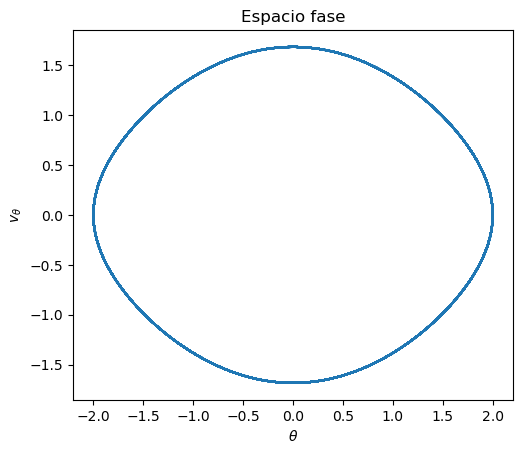

In [59]:
t = linspace(intervalo[0],intervalo[-1],15000)
esp_fase = th_vth.sol(t)
title(r'Espacio fase')
plot(esp_fase[0],esp_fase[1])
xlabel(r'$\theta$'),ylabel(r'$v_{\theta}$')
gca().set_aspect('equal')
show()

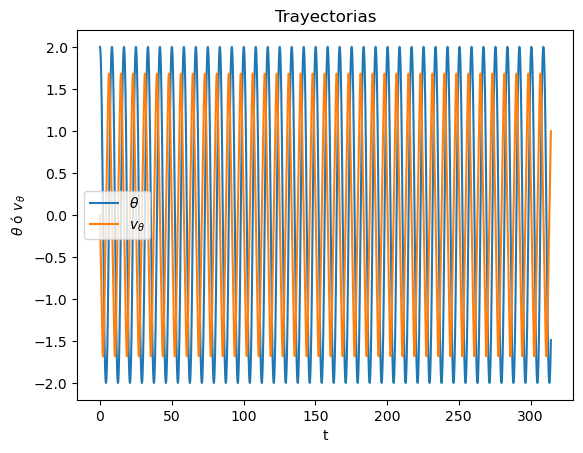

In [61]:
title(r'Trayectorias')
plot(t,esp_fase[0],label=r'$\theta$')
plot(t,esp_fase[1],label=r'$v_{\theta}$')
xlabel(r't'),ylabel(r'$\theta$ ó $v_{\theta}$')
legend()
#gca().set_aspect('equal')
show()

In [62]:
intervalo = (0,10*pi)
N_tray, N_puntos = 10, 500
t = linspace(intervalo[0], intervalo[1], N_puntos)
th_0s = linspace(0.1, pi-0.1, N_tray)
trayectorias = zeros((N_puntos, N_puntos, N_tray))

for i in range(N_tray):
    ci = [th_0s[i],0]
    Ei = E_pendulo(ci)
    th_vth = solve_ivp(pendulo,intervalo,ci,atol=1e-8,rtol=1e-8,dense_output=True)
    Ef = E_pendulo([th_vth.y[0][-1],th_vth.y[1][-1]])
    err_E = abs(Ef-Ei)/Ei
    err_E_p = 100*abs(Ef-Ei)/Ei
    = th_vth.sol(t)

SyntaxError: invalid syntax (2861340026.py, line 14)